In [1]:
import gc

import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [2]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [3]:
negaposi_sentence_split10 = pd.read_csv("../input/feature_negaposi_sentence_split10.csv", index_col=0)
negaposi_describe = pd.read_csv("../input/feature_negaposi_describe.csv", index_col=0)
# word_count100 = pd.read_csv("../input/feature_word_count100.csv", index_col=0) #lightgbmの重要度を見ると上位にcountはほぼ来ずにtfidfが大量に来ていたため
word_count100_tfidf = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)
# word_count100_tfidf_pca10 = pd.read_csv("../input/feature_word_count100_tfidff_pca10.csv", index_col=0)
# word_count100_tfidf_pca100 = pd.read_csv("../input/feature_word_count100_tfidff_pca100.csv", index_col=0)
word_count100_tfidf_pca1000 = pd.read_csv("../input/feature_word_count100_tfidf_pca1000.csv", index_col=0)
katsuyo0 = pd.read_csv("../input/feature_katsuyo0.csv", index_col=0)
katsuyo01 = pd.read_csv("../input/feature_katsuyo01.csv", index_col=0)
adjective012 = pd.read_csv("../input/feature_adjective012.csv", index_col=0)
adjective01 = pd.read_csv("../input/feature_adjective01.csv", index_col=0)
adjective0 = pd.read_csv("../input/feature_adjective0.csv", index_col=0)
hyoki = pd.read_csv("../input/feature_hyoki.csv", index_col=0)

In [4]:
print(negaposi_sentence_split10.shape)
print(negaposi_describe.shape)
# print(word_count100.shape)
print(word_count100_tfidf.shape)
# print(word_count100_tfidf_pca10.shape)
# print(word_count100_tfidf_pca100.shape)
print(word_count100_tfidf_pca1000.shape)
print(katsuyo0.shape)
print(katsuyo01.shape)
print(adjective012.shape)
print(adjective01.shape)
print(adjective0.shape)
print(hyoki.shape)

(4396, 10)
(4732, 5)
(4732, 9502)
(4732, 1000)
(4732, 58)
(4732, 348)
(4732, 67)
(4732, 50)
(4732, 14)
(4732, 14)


In [5]:
data = pd.concat([negaposi_sentence_split10,
                  negaposi_describe,
#                   word_count100,
                  word_count100_tfidf,
#                   word_count100_tfidf_pca10,
#                   word_count100_tfidf_pca100,
                  word_count100_tfidf_pca1000,
                  katsuyo0,
                  katsuyo01,
                  adjective012,
                  adjective01,
                  adjective0,
                  hyoki,
                  ], axis=1)

In [6]:
data

,negaposi_split_0,negaposi_split_1,negaposi_split_2,negaposi_split_3,negaposi_split_4,negaposi_split_5,negaposi_split_6,negaposi_split_7,negaposi_split_8,negaposi_split_9,count,mean,std,min,max,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,あかい_tfidf,あかり_tfidf,あがる_tfidf,あき_tfidf,あきらか_tfidf,あきらめ_tfidf,あきらめる_tfidf,あきる_tfidf,あきれる_tfidf,あく_tfidf,あくどい_tfidf,あくび_tfidf,あくまで_tfidf,あくまでも_tfidf,あぐら_tfidf,あける_tfidf,あげく_tfidf,あげる_tfidf,あこがれ_tfidf,あこがれる_tfidf,あご_tfidf,あさい_tfidf,あさましい_tfidf,あざ_tfidf,あざやか_tfidf,あし_tfidf,あした_tfidf,あす_tfidf,あすこ_tfidf,あずかる_tfidf,あずける_tfidf,あせる_tfidf,あそこ_tfidf,あそぶ_tfidf,あたかも_tfidf,あたし_tfidf,あたたかい_tfidf,あたら_tfidf,あたり_tfidf,あたりまえ_tfidf,あたり前_tfidf,あたる_tfidf,あだな_tfidf,あちこち_tfidf,あちら_tfidf,あっ_tfidf,あっけ_tfidf,あっさり_tfidf,あっし_tfidf,あっち_tfidf,あつい_tfidf,あつかう_tfidf,あつまる_tfidf,あつめる_tfidf,あて_tfidf,あてる_tfidf,あと_tfidf,あな_tfidf,あながち_tfidf,あなた_tfidf,あに_tfidf,あにい_tfidf,あの_tfidf,あはれ_tfidf,あばれる_tfidf,あびる_tfidf,あふる_tfidf,あふれる_tfidf,あぶない_tfidf,あぶる_tfidf,あべこべ_tfidf,あま_tfidf,あまり_tfidf,あまりに_tfidf,あまる_tfidf,...,名詞特殊助動詞語幹,名詞非自立一般,名詞非自立副詞可能,名詞非自立助動詞語幹,名詞非自立形容動詞語幹,形容詞接尾*,形容詞自立*,形容詞非自立*,感動詞**,接続詞**,接頭詞動詞接続*,接頭詞名詞接続*,接頭詞形容詞接続*,接頭詞数接続*,記号アルファベット*,記号一般*,記号句点*,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS*,その他間投,フィラー*,副詞一般,副詞助詞類接続,助動詞*,助詞並立助詞,助詞係助詞,助詞副助詞,助詞副助詞／並立助詞／終助詞,助詞副詞化,助詞接続助詞,助詞格助詞,助詞特殊,助詞終助詞,助詞連体化,動詞接尾,動詞自立,動詞非自立,名詞サ変接続,名詞ナイ形容詞語幹,名詞一般,名詞代名詞,名詞副詞可能,名詞動詞非自立的,名詞固有名詞,名詞引用文字列,名詞形容動詞語幹,名詞接尾,名詞接続詞的,名詞数,名詞特殊,名詞非自立,形容詞接尾,形容詞自立,形容詞非自立,感動詞*,接続詞*,接頭詞動詞接続,接頭詞名詞接続,接頭詞形容詞接続,接頭詞数接続,記号アルファベット,記号一般,記号句点,記号括弧閉,記号括弧開,記号空白,記号読点,連体詞*,BOS/EOS,その他,フィラー,副詞,助動詞,助詞,動詞,名詞,形容詞,感動詞,接続詞,接頭詞,記号,連体詞,letter_number,kanji,hiragana,katakana,digit,alphabet,old_kanji,old_hiragana,old,lowercase,hagyo,kakko,kagikakko,kutoten
0,-0.189030,-0.130570,-0.175781,-0.159920,-0.241814,-0.230414,-0.068126,-0.187654,-0.146884,-0.111569,14.0,-0.152729,0.053904,-0.241814,-0.068126,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033818,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0,15,1,1,0,1,6,1,0,3,0,0,0,0,0,12,14,4,4,6,24,6,2,0,4,4,3,44,1,22,3,0,1,13,55,0,0,22,2,42,8,15,1,56,12,2,0,5,0,7,6,0,0,0,17,1,6,1,0,3,0,0,0,0,0,12,14,4,4,6,24,6,2,0,4,7,44,117,52,121,8,0,3,0,64,6,651.0,0.298003,0.594470,0.036866,0.000000,0.000000,0.001536,0.000000,0.001536,0.007680,0.016897,0.000000,0.012289,0.058372
1,-0.112867,-0.149643,-0.163352,-0.187332,-0.184833,-0.069419,-0.144469,-0.173366,-0.115937,-0.085715,20.0,-0.138693,0.054466,-0.250899,-0.037045,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082680,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0,17,14,4,1,0,17,0,2,7,0,11,0,0,0,7,20,7,7,3,87,18,2,0,1,12,6,69,13,38,8,5,5,31,122,0,1,48,4,84,5,15,0,144,18,13,0,19,0,10,23,0,5,0,36,0,17,0,2,7,0,11,0,0,0,7,20,7,7,3,87,18,2,0,1,18,69,271,93,283,17,2,7,11,131,18,1363.0,0.319883,0.562729,0.026412,0.000000,0.000000,0.000000,0.005136,0.005136,0.000000,

In [7]:
del negaposi_sentence_split10
del negaposi_describe
# del word_count100
del word_count100_tfidf
# del word_count100_tfidf_pca10
# del word_count100_tfidf_pca100
del word_count100_tfidf_pca1000
del katsuyo0
del katsuyo01
del adjective012
del adjective01
del adjective0
del hyoki

gc.collect()

62

In [8]:
y = pd.read_csv("../input/target.csv", index_col=0, names=["target"])

In [9]:
y

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [10]:
train_index = y[y["target"].notna()].index
test_index = y[y["target"].isna()].index

In [11]:
X_train_valid = data.iloc[train_index]
X_test = data.iloc[test_index]
y_train_valid = y.iloc[train_index]
y_train_valid = y_train_valid.astype(int)

In [12]:
del data, y
gc.collect()

246

# 学習・予測

In [13]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### hold out

In [14]:
col_name = X_train_valid.columns.values
X_train_valid.columns = range(X_train_valid.shape[1])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)

In [15]:
train = lgb.Dataset(X_train, label=y_train)
valid = lgb.Dataset(X_valid, label=y_valid)

In [16]:
params = {
    'boosting_type':'gbdt', 
    'objective':'binary',
    "metric":"binary_logloss", 
    'n_estimators':10000,
    'random_state':0,
    'learning_rate':0.01,
    'max_depth':3,
    "min_chlid_wight":1,
    'gamma':0,
    'colsample_bytree':0.8,
    'subsamples':0.8,
    'reg_alpha':0,
    'reg_lambda':1,
}

model = lgb.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  num_boost_round=1000,
                  early_stopping_rounds=50,
                  verbose_eval=1,
                 )

[1]	training's binary_logloss: 0.262208	valid_1's binary_logloss: 0.264357
Training until validation scores don't improve for 50 rounds
[2]	training's binary_logloss: 0.255662	valid_1's binary_logloss: 0.258629
[3]	training's binary_logloss: 0.249681	valid_1's binary_logloss: 0.253452
[4]	training's binary_logloss: 0.244014	valid_1's binary_logloss: 0.248638
[5]	training's binary_logloss: 0.23889	valid_1's binary_logloss: 0.244171
[6]	training's binary_logloss: 0.234764	valid_1's binary_logloss: 0.240775
[7]	training's binary_logloss: 0.230988	valid_1's binary_logloss: 0.237832
[8]	training's binary_logloss: 0.226629	valid_1's binary_logloss: 0.234216
[9]	training's binary_logloss: 0.222527	valid_1's binary_logloss: 0.230607
[10]	training's binary_logloss: 0.218645	valid_1's binary_logloss: 0.227421
[11]	training's binary_logloss: 0.21496	valid_1's binary_logloss: 0.224245
[12]	training's binary_logloss: 0.211452	valid_1's binary_logloss: 0.221345
[13]	training's binary_logloss: 0.2080

[109]	training's binary_logloss: 0.0776935	valid_1's binary_logloss: 0.100858
[110]	training's binary_logloss: 0.0771638	valid_1's binary_logloss: 0.100418
[111]	training's binary_logloss: 0.0765245	valid_1's binary_logloss: 0.0998603
[112]	training's binary_logloss: 0.0758786	valid_1's binary_logloss: 0.0992034
[113]	training's binary_logloss: 0.0752421	valid_1's binary_logloss: 0.0985555
[114]	training's binary_logloss: 0.0746272	valid_1's binary_logloss: 0.098019
[115]	training's binary_logloss: 0.0740129	valid_1's binary_logloss: 0.0974667
[116]	training's binary_logloss: 0.0733989	valid_1's binary_logloss: 0.0968444
[117]	training's binary_logloss: 0.0728052	valid_1's binary_logloss: 0.0962378
[118]	training's binary_logloss: 0.0722539	valid_1's binary_logloss: 0.0956832
[119]	training's binary_logloss: 0.0717094	valid_1's binary_logloss: 0.095063
[120]	training's binary_logloss: 0.0711226	valid_1's binary_logloss: 0.0945636
[121]	training's binary_logloss: 0.0705553	valid_1's bin

[217]	training's binary_logloss: 0.0354431	valid_1's binary_logloss: 0.0600858
[218]	training's binary_logloss: 0.0351968	valid_1's binary_logloss: 0.059833
[219]	training's binary_logloss: 0.0349638	valid_1's binary_logloss: 0.0595848
[220]	training's binary_logloss: 0.0347232	valid_1's binary_logloss: 0.0593683
[221]	training's binary_logloss: 0.0344977	valid_1's binary_logloss: 0.0591537
[222]	training's binary_logloss: 0.0342678	valid_1's binary_logloss: 0.0589211
[223]	training's binary_logloss: 0.0340344	valid_1's binary_logloss: 0.0587318
[224]	training's binary_logloss: 0.0338134	valid_1's binary_logloss: 0.0585265
[225]	training's binary_logloss: 0.0335926	valid_1's binary_logloss: 0.0582899
[226]	training's binary_logloss: 0.0333744	valid_1's binary_logloss: 0.0580561
[227]	training's binary_logloss: 0.0331815	valid_1's binary_logloss: 0.057927
[228]	training's binary_logloss: 0.032977	valid_1's binary_logloss: 0.057695
[229]	training's binary_logloss: 0.0327645	valid_1's bin

[323]	training's binary_logloss: 0.0187587	valid_1's binary_logloss: 0.0431931
[324]	training's binary_logloss: 0.0186527	valid_1's binary_logloss: 0.0430804
[325]	training's binary_logloss: 0.0185635	valid_1's binary_logloss: 0.042976
[326]	training's binary_logloss: 0.0184599	valid_1's binary_logloss: 0.0428513
[327]	training's binary_logloss: 0.0183575	valid_1's binary_logloss: 0.0427702
[328]	training's binary_logloss: 0.0182689	valid_1's binary_logloss: 0.0426672
[329]	training's binary_logloss: 0.0181691	valid_1's binary_logloss: 0.0425691
[330]	training's binary_logloss: 0.018072	valid_1's binary_logloss: 0.0424647
[331]	training's binary_logloss: 0.0179807	valid_1's binary_logloss: 0.0423596
[332]	training's binary_logloss: 0.0178834	valid_1's binary_logloss: 0.0422621
[333]	training's binary_logloss: 0.017784	valid_1's binary_logloss: 0.0421531
[334]	training's binary_logloss: 0.0176984	valid_1's binary_logloss: 0.0420852
[335]	training's binary_logloss: 0.0176042	valid_1's bi

[429]	training's binary_logloss: 0.0110403	valid_1's binary_logloss: 0.0347007
[430]	training's binary_logloss: 0.0109898	valid_1's binary_logloss: 0.0346375
[431]	training's binary_logloss: 0.0109405	valid_1's binary_logloss: 0.0345764
[432]	training's binary_logloss: 0.0108887	valid_1's binary_logloss: 0.0345137
[433]	training's binary_logloss: 0.0108332	valid_1's binary_logloss: 0.0345008
[434]	training's binary_logloss: 0.0107789	valid_1's binary_logloss: 0.0344163
[435]	training's binary_logloss: 0.0107235	valid_1's binary_logloss: 0.0343877
[436]	training's binary_logloss: 0.0106791	valid_1's binary_logloss: 0.0343554
[437]	training's binary_logloss: 0.0106325	valid_1's binary_logloss: 0.0343161
[438]	training's binary_logloss: 0.0105804	valid_1's binary_logloss: 0.034245
[439]	training's binary_logloss: 0.0105236	valid_1's binary_logloss: 0.0341808
[440]	training's binary_logloss: 0.0104744	valid_1's binary_logloss: 0.0340951
[441]	training's binary_logloss: 0.0104281	valid_1's 

[534]	training's binary_logloss: 0.00697036	valid_1's binary_logloss: 0.0301257
[535]	training's binary_logloss: 0.00694441	valid_1's binary_logloss: 0.0300727
[536]	training's binary_logloss: 0.00691465	valid_1's binary_logloss: 0.030037
[537]	training's binary_logloss: 0.00688892	valid_1's binary_logloss: 0.030012
[538]	training's binary_logloss: 0.00685827	valid_1's binary_logloss: 0.0300068
[539]	training's binary_logloss: 0.00683062	valid_1's binary_logloss: 0.0299896
[540]	training's binary_logloss: 0.00680474	valid_1's binary_logloss: 0.0299511
[541]	training's binary_logloss: 0.00677462	valid_1's binary_logloss: 0.0299175
[542]	training's binary_logloss: 0.00674384	valid_1's binary_logloss: 0.0298804
[543]	training's binary_logloss: 0.00671771	valid_1's binary_logloss: 0.0298481
[544]	training's binary_logloss: 0.00669237	valid_1's binary_logloss: 0.029817
[545]	training's binary_logloss: 0.00666717	valid_1's binary_logloss: 0.029786
[546]	training's binary_logloss: 0.00664068	

[643]	training's binary_logloss: 0.00453881	valid_1's binary_logloss: 0.0275994
[644]	training's binary_logloss: 0.00452183	valid_1's binary_logloss: 0.027602
[645]	training's binary_logloss: 0.0045048	valid_1's binary_logloss: 0.0275875
[646]	training's binary_logloss: 0.00448769	valid_1's binary_logloss: 0.0275655
[647]	training's binary_logloss: 0.00447266	valid_1's binary_logloss: 0.0275519
[648]	training's binary_logloss: 0.00445702	valid_1's binary_logloss: 0.027542
[649]	training's binary_logloss: 0.00444053	valid_1's binary_logloss: 0.0275097
[650]	training's binary_logloss: 0.00442373	valid_1's binary_logloss: 0.0274903
[651]	training's binary_logloss: 0.00440694	valid_1's binary_logloss: 0.027476
[652]	training's binary_logloss: 0.00439344	valid_1's binary_logloss: 0.0274516
[653]	training's binary_logloss: 0.0043768	valid_1's binary_logloss: 0.0274544
[654]	training's binary_logloss: 0.00436006	valid_1's binary_logloss: 0.027432
[655]	training's binary_logloss: 0.00434472	va

[747]	training's binary_logloss: 0.003154	valid_1's binary_logloss: 0.0261087
[748]	training's binary_logloss: 0.00314407	valid_1's binary_logloss: 0.0261189
[749]	training's binary_logloss: 0.0031356	valid_1's binary_logloss: 0.026097
[750]	training's binary_logloss: 0.00312519	valid_1's binary_logloss: 0.0260733
[751]	training's binary_logloss: 0.00311594	valid_1's binary_logloss: 0.0260879
[752]	training's binary_logloss: 0.00310581	valid_1's binary_logloss: 0.0260766
[753]	training's binary_logloss: 0.00309635	valid_1's binary_logloss: 0.02605
[754]	training's binary_logloss: 0.0030847	valid_1's binary_logloss: 0.0260472
[755]	training's binary_logloss: 0.00307455	valid_1's binary_logloss: 0.0260427
[756]	training's binary_logloss: 0.00306407	valid_1's binary_logloss: 0.0260135
[757]	training's binary_logloss: 0.00305423	valid_1's binary_logloss: 0.0259892
[758]	training's binary_logloss: 0.00304478	valid_1's binary_logloss: 0.0259929
[759]	training's binary_logloss: 0.00303592	val

[853]	training's binary_logloss: 0.00228647	valid_1's binary_logloss: 0.0253302
[854]	training's binary_logloss: 0.00227907	valid_1's binary_logloss: 0.0253311
[855]	training's binary_logloss: 0.00227286	valid_1's binary_logloss: 0.0253217
[856]	training's binary_logloss: 0.00226633	valid_1's binary_logloss: 0.0253072
[857]	training's binary_logloss: 0.00226037	valid_1's binary_logloss: 0.0252865
[858]	training's binary_logloss: 0.00225417	valid_1's binary_logloss: 0.0252694
[859]	training's binary_logloss: 0.00224696	valid_1's binary_logloss: 0.0252699
[860]	training's binary_logloss: 0.00224097	valid_1's binary_logloss: 0.0252766
[861]	training's binary_logloss: 0.00223491	valid_1's binary_logloss: 0.0252749
[862]	training's binary_logloss: 0.00222845	valid_1's binary_logloss: 0.0252478
[863]	training's binary_logloss: 0.00222262	valid_1's binary_logloss: 0.0252186
[864]	training's binary_logloss: 0.00221674	valid_1's binary_logloss: 0.0252103
[865]	training's binary_logloss: 0.00220

[956]	training's binary_logloss: 0.00174625	valid_1's binary_logloss: 0.0246253
[957]	training's binary_logloss: 0.00174175	valid_1's binary_logloss: 0.024639
[958]	training's binary_logloss: 0.00173776	valid_1's binary_logloss: 0.0246127
[959]	training's binary_logloss: 0.00173391	valid_1's binary_logloss: 0.0246071
[960]	training's binary_logloss: 0.0017296	valid_1's binary_logloss: 0.0246021
[961]	training's binary_logloss: 0.00172609	valid_1's binary_logloss: 0.0245857
[962]	training's binary_logloss: 0.00172208	valid_1's binary_logloss: 0.0245891
[963]	training's binary_logloss: 0.00171821	valid_1's binary_logloss: 0.0245908
[964]	training's binary_logloss: 0.00171435	valid_1's binary_logloss: 0.024583
[965]	training's binary_logloss: 0.00170943	valid_1's binary_logloss: 0.0245869
[966]	training's binary_logloss: 0.00170522	valid_1's binary_logloss: 0.0245578
[967]	training's binary_logloss: 0.00170134	valid_1's binary_logloss: 0.0245567
[968]	training's binary_logloss: 0.00169672

[1064]	training's binary_logloss: 0.00136717	valid_1's binary_logloss: 0.0241237
[1065]	training's binary_logloss: 0.0013641	valid_1's binary_logloss: 0.0241376
[1066]	training's binary_logloss: 0.00136147	valid_1's binary_logloss: 0.0241337
[1067]	training's binary_logloss: 0.00135855	valid_1's binary_logloss: 0.0241386
[1068]	training's binary_logloss: 0.00135601	valid_1's binary_logloss: 0.024129
[1069]	training's binary_logloss: 0.00135308	valid_1's binary_logloss: 0.0241344
[1070]	training's binary_logloss: 0.00135028	valid_1's binary_logloss: 0.0241156
[1071]	training's binary_logloss: 0.00134763	valid_1's binary_logloss: 0.0241177
[1072]	training's binary_logloss: 0.00134434	valid_1's binary_logloss: 0.0241217
[1073]	training's binary_logloss: 0.00134147	valid_1's binary_logloss: 0.0241197
[1074]	training's binary_logloss: 0.00133886	valid_1's binary_logloss: 0.0241169
[1075]	training's binary_logloss: 0.0013361	valid_1's binary_logloss: 0.0241106
[1076]	training's binary_loglos

[1170]	training's binary_logloss: 0.00110964	valid_1's binary_logloss: 0.0238914
[1171]	training's binary_logloss: 0.00110725	valid_1's binary_logloss: 0.0238954
[1172]	training's binary_logloss: 0.0011051	valid_1's binary_logloss: 0.0238894
[1173]	training's binary_logloss: 0.00110296	valid_1's binary_logloss: 0.0238992
[1174]	training's binary_logloss: 0.0011007	valid_1's binary_logloss: 0.0239023
[1175]	training's binary_logloss: 0.00109867	valid_1's binary_logloss: 0.023888
[1176]	training's binary_logloss: 0.00109667	valid_1's binary_logloss: 0.0238825
[1177]	training's binary_logloss: 0.00109478	valid_1's binary_logloss: 0.0238912
[1178]	training's binary_logloss: 0.00109297	valid_1's binary_logloss: 0.0238973
[1179]	training's binary_logloss: 0.00109082	valid_1's binary_logloss: 0.0239129
[1180]	training's binary_logloss: 0.00108874	valid_1's binary_logloss: 0.0238993
[1181]	training's binary_logloss: 0.00108686	valid_1's binary_logloss: 0.0238792
[1182]	training's binary_loglos

[1272]	training's binary_logloss: 0.000926529	valid_1's binary_logloss: 0.0237657
[1273]	training's binary_logloss: 0.000924921	valid_1's binary_logloss: 0.0237598
[1274]	training's binary_logloss: 0.000923355	valid_1's binary_logloss: 0.0237401
[1275]	training's binary_logloss: 0.000921771	valid_1's binary_logloss: 0.023738
[1276]	training's binary_logloss: 0.000920482	valid_1's binary_logloss: 0.0237261
[1277]	training's binary_logloss: 0.00091874	valid_1's binary_logloss: 0.0237279
[1278]	training's binary_logloss: 0.000917128	valid_1's binary_logloss: 0.0237396
[1279]	training's binary_logloss: 0.000915744	valid_1's binary_logloss: 0.0237328
[1280]	training's binary_logloss: 0.000914183	valid_1's binary_logloss: 0.0237307
[1281]	training's binary_logloss: 0.000912665	valid_1's binary_logloss: 0.0237176
[1282]	training's binary_logloss: 0.00091119	valid_1's binary_logloss: 0.0237028
[1283]	training's binary_logloss: 0.000909673	valid_1's binary_logloss: 0.0237121
[1284]	training's b

[1376]	training's binary_logloss: 0.000787173	valid_1's binary_logloss: 0.0236624
[1377]	training's binary_logloss: 0.000785966	valid_1's binary_logloss: 0.0236567
[1378]	training's binary_logloss: 0.000784781	valid_1's binary_logloss: 0.0236492
[1379]	training's binary_logloss: 0.000783553	valid_1's binary_logloss: 0.0236374
[1380]	training's binary_logloss: 0.000782437	valid_1's binary_logloss: 0.0236374
[1381]	training's binary_logloss: 0.000781365	valid_1's binary_logloss: 0.0236516
[1382]	training's binary_logloss: 0.000780332	valid_1's binary_logloss: 0.0236443
[1383]	training's binary_logloss: 0.000779166	valid_1's binary_logloss: 0.0236489
[1384]	training's binary_logloss: 0.000777867	valid_1's binary_logloss: 0.0236502
[1385]	training's binary_logloss: 0.000776715	valid_1's binary_logloss: 0.023636
[1386]	training's binary_logloss: 0.00077554	valid_1's binary_logloss: 0.0236301
[1387]	training's binary_logloss: 0.000774361	valid_1's binary_logloss: 0.0236296
[1388]	training's 

### grid search

In [17]:
# col_name = X_train_valid.columns.values
# X_train_valid.columns = range(X_train_valid.shape[1])

In [18]:
# # https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

# fit_params={
#     "early_stopping_rounds":30,
#     "eval_set" : [(X_train_valid, y_train_valid)],
#     'eval_names': ['valid'],
#     'verbose': 10
#     }

# param_grid ={
#     'boosting_type':['gbdt'], 
#     'objective':['binary'],
#     "metric":["binary_logloss"], 
#     'n_estimators':[10000],
#     'random_state':[0],
#     'learning_rate':[0.1],
#     'max_depth':[3]#, 5, 7], #3~9
#     "min_chlid_wight":[1]#, 3, 5], #1~5
#     'gamma':[0], #0~0.4
#     'colsample_bytree':[0.8],
#     'subsamples':[0.8],
#     'reg_alpha':[0]#, 0.1, 1],
#     'reg_lambda':[1]#, 0.1, 0]
#     }

# clf = lgb.LGBMClassifier()

# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
# #     cv=2,
#     cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
#     scoring='f1',
#     refit=True,
#     verbose=3
#     )

# grid_search.fit(X_train_valid, y_train_valid, **fit_params)

# print("\n"+"*"*50)
# print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))
# print("*"*50)

In [19]:
# grid_search.best_params_

In [20]:
# params = grid_search.best_params_

In [21]:
# params["learning_rate"] = 0.01

### param決め打ち

In [22]:
# col_name = X_train_valid.columns.values
# X_train_valid.columns = range(X_train_valid.shape[1])

In [23]:
# params={
#     'boosting_type':'gbdt', 
#     'objective':'binary',
#     "metric":"binary_logloss", 
#     'n_estimators':10000,
#     'random_state':0,
#     'learning_rate':0.01,
#     'max_depth':3,
#     "min_chlid_wight":1,
#     'gamma':0,
#     'colsample_bytree':0.8,
#     'subsamples':0.8,
#     'reg_alpha':0,
#     'reg_lambda':1
#     }

In [24]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)
# X_train.columns = range(X_train.shape[1])
# X_valid.columns = range(X_valid.shape[1])

In [25]:
# train = lgb.Dataset(X_train, label=y_train)
# valid = lgb.Dataset(X_valid, label=y_valid)

In [26]:
# model = lgb.train(params=params,
#                   train_set=train,
#                   valid_sets=[train, valid],
#                   num_boost_round=1000,
#                   early_stopping_rounds=30,
#                   verbose_eval=10,
#                  )

### output

In [27]:
y_valid_pred = model.predict(X_valid)

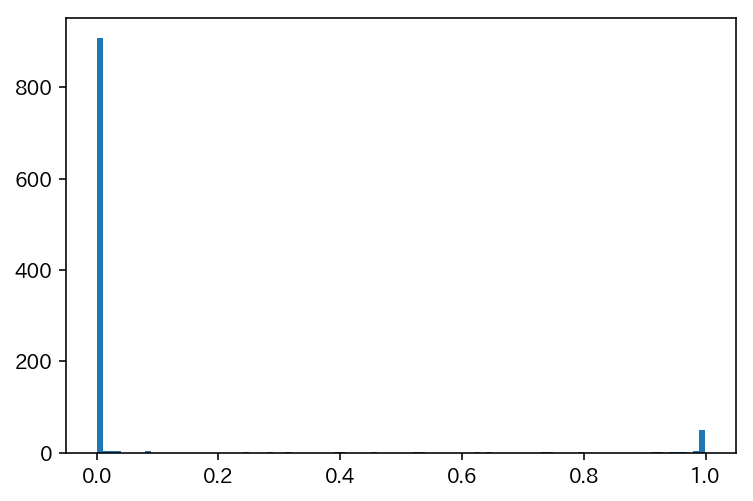

In [28]:
plt.hist(y_valid_pred, bins=100)
plt.show()

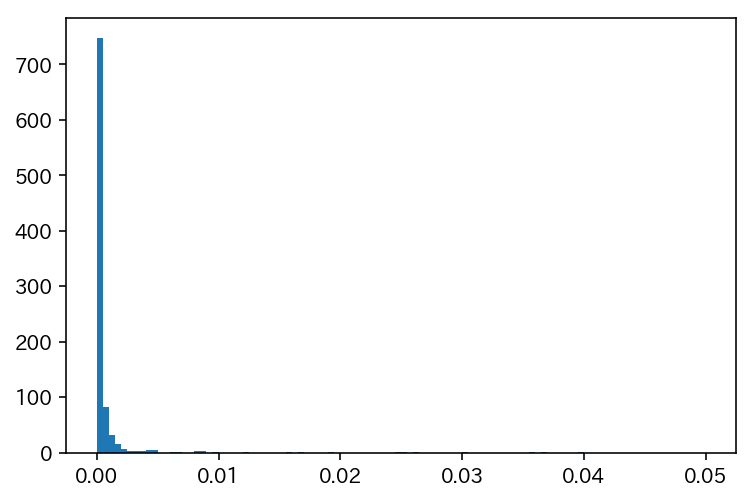

In [29]:
plt.hist(y_valid_pred, bins=100, range=(0, 0.05))
plt.show()

In [30]:
def evaluation(y_valid_pred, threshold):
    print("-"*30)
    print("threshold : " + str(threshold))
    print('acc : ' + str(accuracy_score(y_valid==0, (y_valid_pred)<threshold)))
    print('recall : ' + str(recall_score(y_valid==0, (y_valid_pred)<threshold)))
    print('precision : ' + str(precision_score(y_valid==0, (y_valid_pred)<threshold)))
    print('f1 : ' + str(f1_score(y_valid==0, (y_valid_pred)<threshold)))
    cm = confusion_matrix(y_valid==0, (y_valid_pred)<threshold)
    print(cm)
    return f1_score(y_valid==0, (y_valid_pred)<threshold)

In [31]:
f1_best = 0.0
threshold_best = 0.0
for threshold in range(0, 20):
    f1 = evaluation(y_valid_pred, threshold/100)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold/100
print("\n"+"*"*30)
print("best threshold : " + str(threshold_best))
print("best f1_score : " + str(f1_best))
print("*"*30)

------------------------------
threshold : 0.0
acc : 0.07645875251509054
recall : 0.0
precision : 0.0
f1 : 0.0
[[ 76   0]
 [918   0]]
------------------------------
threshold : 0.01
acc : 0.9889336016096579
recall : 0.9880174291938998
precision : 1.0
f1 : 0.9939726027397261
[[ 76   0]
 [ 11 907]]
------------------------------
threshold : 0.02
acc : 0.9929577464788732
recall : 0.9923747276688453
precision : 1.0
f1 : 0.996172772006561
[[ 76   0]
 [  7 911]]
------------------------------
threshold : 0.03
acc : 0.9959758551307847
recall : 0.9956427015250545
precision : 1.0
f1 : 0.9978165938864628
[[ 76   0]
 [  4 914]]
------------------------------
threshold : 0.04
acc : 0.9959758551307847
recall : 0.9978213507625272
precision : 0.9978213507625272
f1 : 0.9978213507625272
[[ 74   2]
 [  2 916]]
------------------------------
threshold : 0.05
acc : 0.9959758551307847
recall : 0.9978213507625272
precision : 0.9978213507625272
f1 : 0.9978213507625272
[[ 74   2]
 [  2 916]]
-----------------

In [32]:
importance = model.feature_importance(importance_type='gain')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

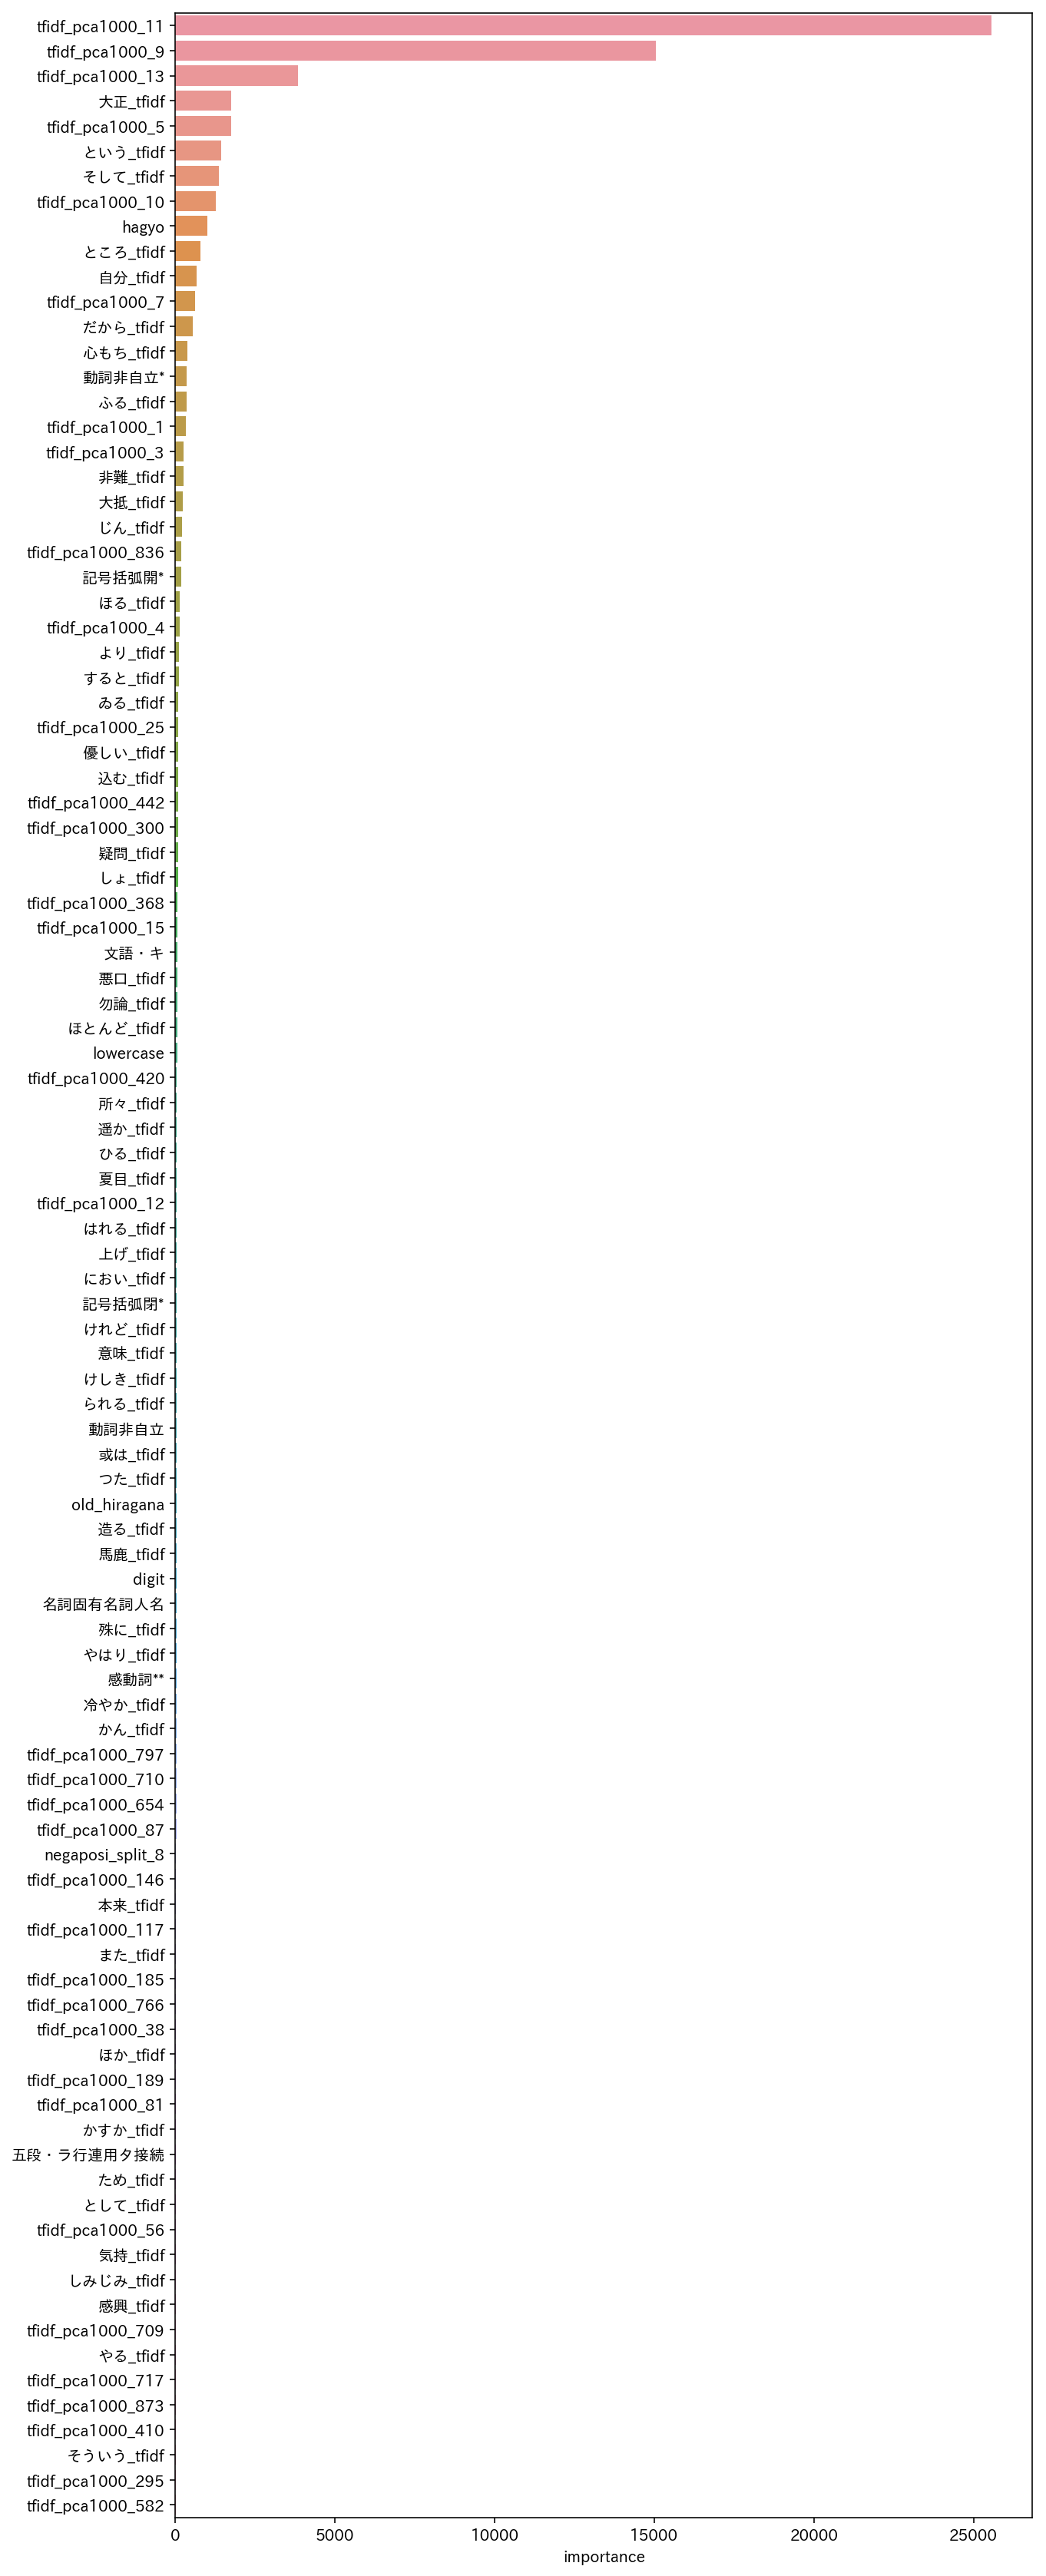

In [33]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [34]:
importance = model.feature_importance(importance_type='split')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

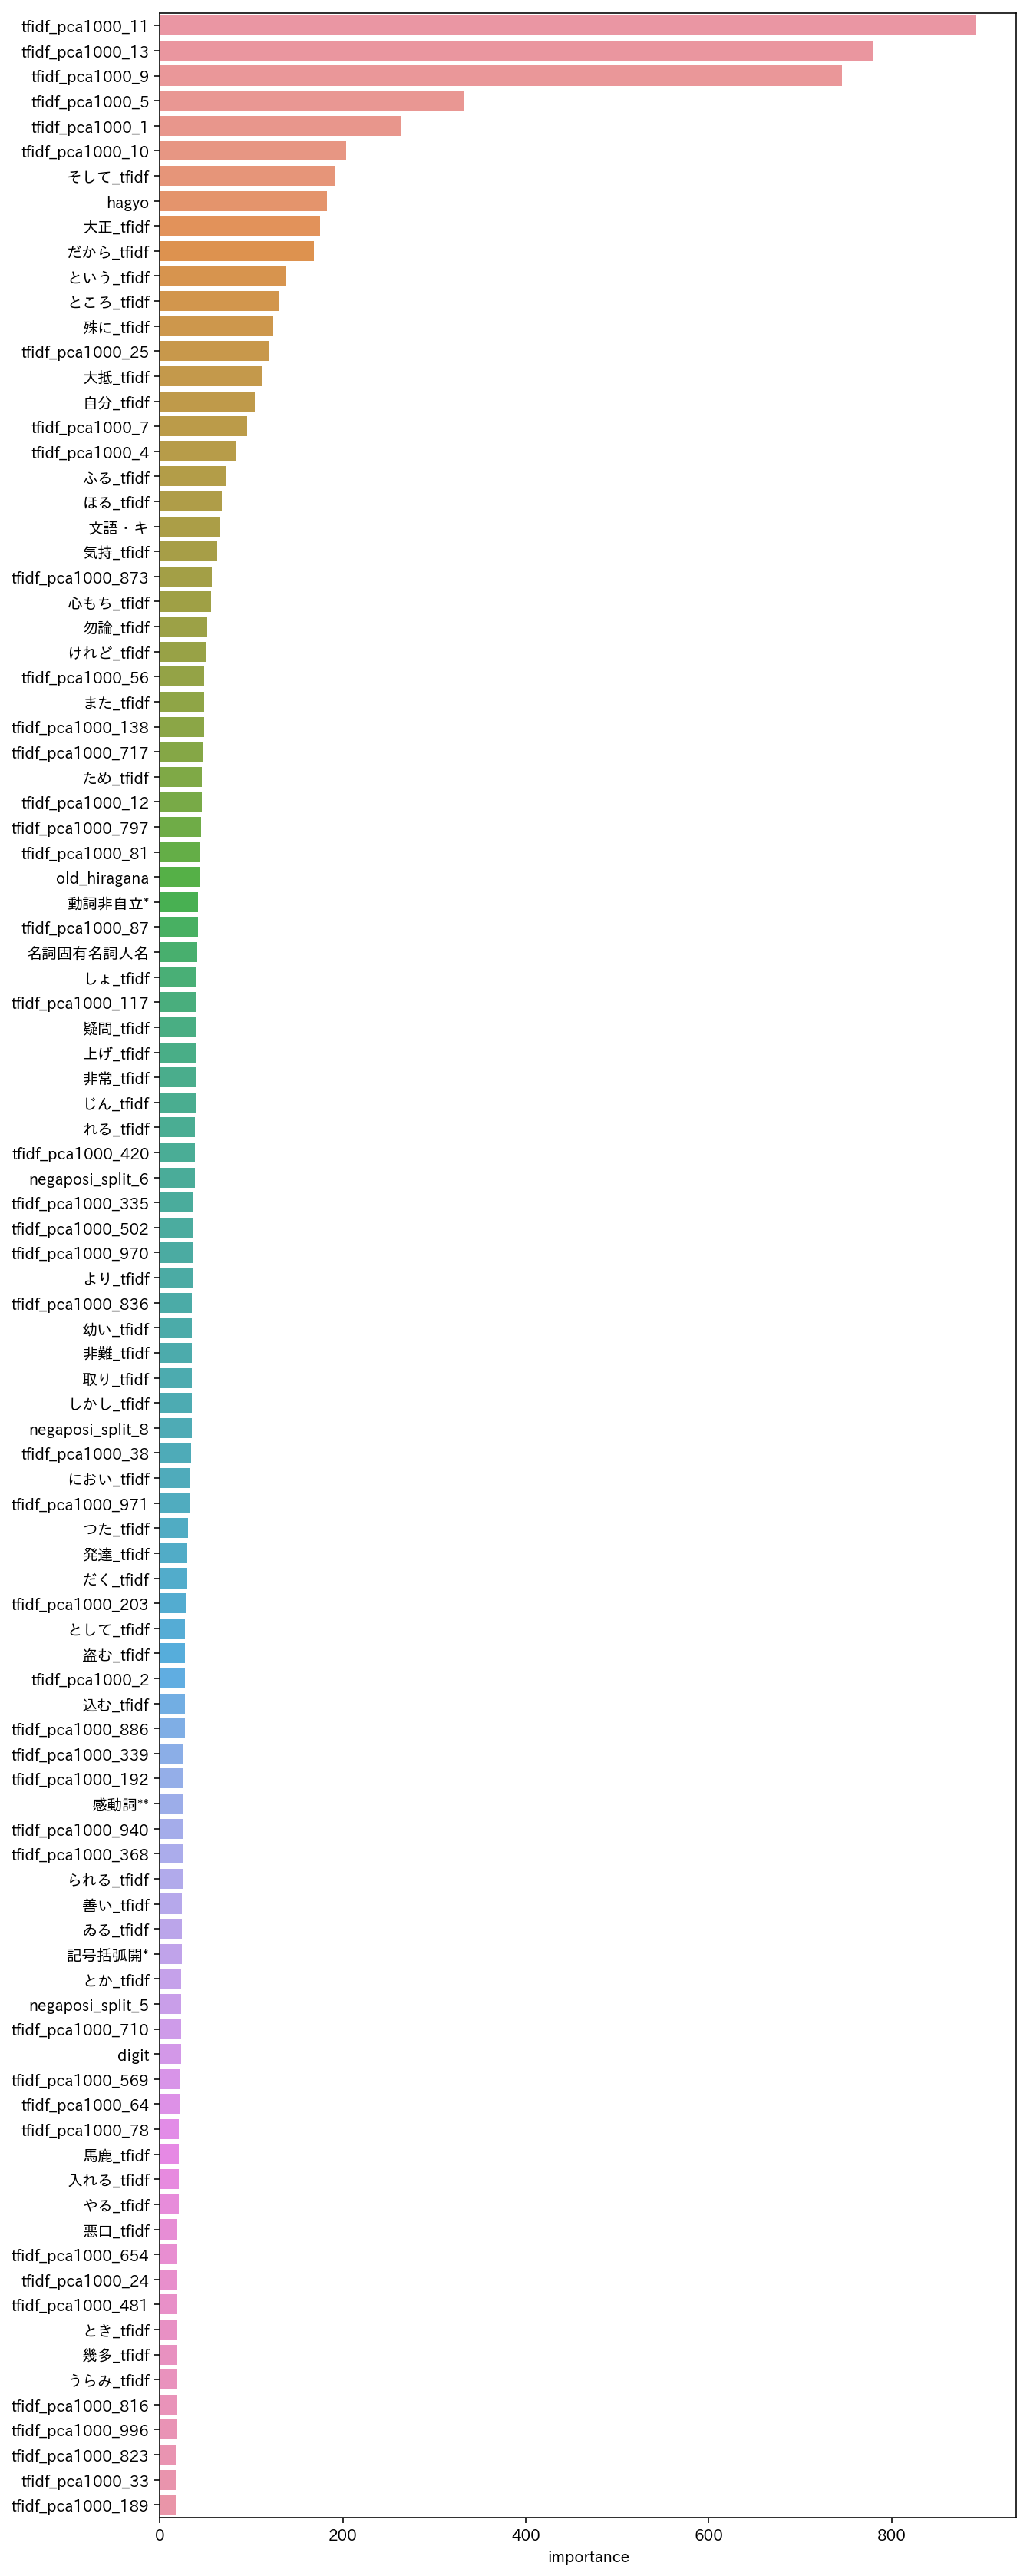

In [35]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [36]:
y_test = model.predict(X_test)

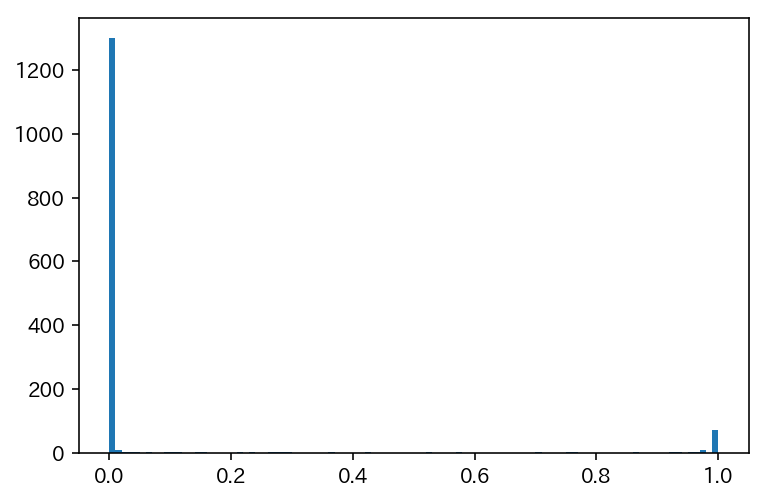

In [38]:
plt.hist(y_test, bins=100)
plt.show()

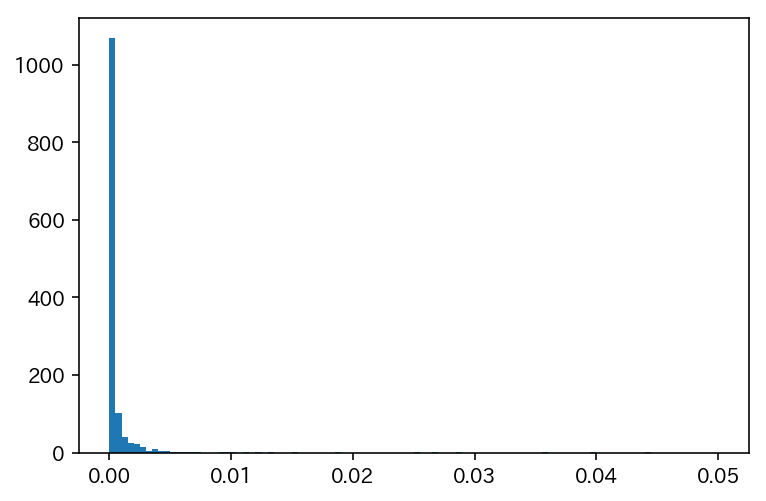

In [39]:
plt.hist(y_test, bins=100, range=(0, 0.05))
plt.show()

In [40]:
print("threshold_best : " + str(threshold_best))
print("akutagawa : " + str(sum((y_test > threshold_best)*1)))
print("not akutagawa : " + str(sum((y_test <= threshold_best)*1)))

threshold_best : 0.04
akutagawa : 107
not akutagawa : 1313


In [41]:
submit_sample = pd.read_csv("../input/sample_submission.csv", index_col=0)
submit_sample

,author
writing_id,
4,0
5,0
6,1
10,1
11,1
13,1
18,0
21,0
26,1


In [42]:
submit_sample["author"] = (y_test > threshold_best)*1
submit_sample

,author
writing_id,
4,0
5,0
6,0
10,0
11,0
13,0
18,0
21,0
26,0


In [43]:
submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])

0.9246478873239437

In [44]:
y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])

0.9240724762726489

In [45]:
submit_sample.to_csv("../input/submission_0113_1.csv")